In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.special import erf, erfinv

(array([ 4.,  3., 13., 19., 23., 17., 13.,  6.,  1.,  1.]),
 array([-2.03576411, -1.56256305, -1.089362  , -0.61616095, -0.14295989,
         0.33024116,  0.80344222,  1.27664327,  1.74984432,  2.22304538,
         2.69624643]),
 <a list of 10 Patch objects>)

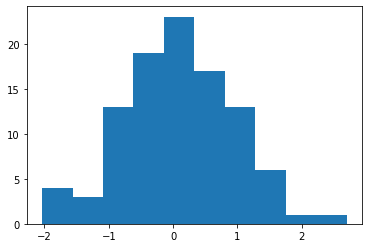

In [2]:
u = np.random.rand(100)
plt.hist(erfinv(2*u-1)*np.sqrt(2))

-0.022326768522921866 17.796902206773645
0.2222194580716489 5.103470003166812
0.11321254770903857 2.055135022998595
-0.08912515664171675 1.1225848421374582
-0.059889571106800016 0.7707084129695494


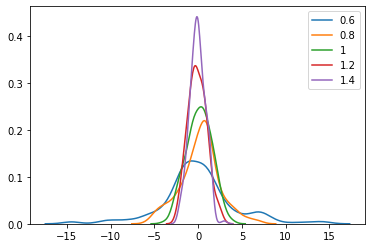

In [27]:
def invcdf(x, mean, var, epsilon, delta):
    """inverse CDF of sinh-arcsinh transform of normal distrubution"""
    return np.sinh(epsilon/delta + 1/delta * np.arcsinh(mean + np.sqrt(2*var) * erfinv(2*x-1)))


fig, ax = plt.subplots()
for d in [0.6, 0.8, 1, 1.2, 1.4]:
    size = 200
    u = np.random.rand(size)
    samples = invcdf(u, 0, 2, 0, d)
    print(samples.mean(), samples.var())
    sns.kdeplot(samples, label=str(d), ax=ax)
plt.legend()

In [105]:
from scipy.special import kv

def P(q):
    return np.exp(1)**0.25 * (kv(q/2+0.5, 0.25) + kv(q/2-0.5, 0.25)) / np.sqrt(8*np.pi)

def moments(epsilon, delta):
    m1 = np.sinh(epsilon/delta) * P(1/delta)
    m2 = 0.5 * np.cosh(2*epsilon/delta) * P(2/delta) - 0.5
    m3 = 0.25 * (np.sinh(3*epsilon/delta) * P(3/delta) - 3 * np.sinh(epsilon/delta) * P(1/delta))
    m4 = 0.125 * (np.cosh(4*epsilon/delta) * P(4/delta) - 4 * np.cosh(2*epsilon/delta) * P(2/delta) + 3)
    return (m1, m2, m3, m4)

m1, m2, m3, m4 = moments(0, 1.2)
print(m2 - m1**2)

size=1000
u = np.random.rand(size)
samples = invcdf(u, 0, 2, 0, 1.2)
samples.var()

0.603310702388558


In [120]:
tvar = np.mean(vv)
tvar

def est_tvar(delta, size, times):
    """estimate theory variance"""
    variances = np.zeros((times,))
    for i in range(times):
        u = np.random.rand(size)
        samples = invcdf(u, 0, 2, 0, delta)
        variances[i] = samples.var()
    return np.mean(variances)

est_tvar(1.2, 1000, 1000)

1.1294620243289357

0.1007052493268094 2.5940052890087255
-0.1317259127007842 2.209310670318912
0.15825384618399485 2.1839499784727976
0.08093322457651514 2.120403517009711
-0.1724509438524632 1.8674060555247696


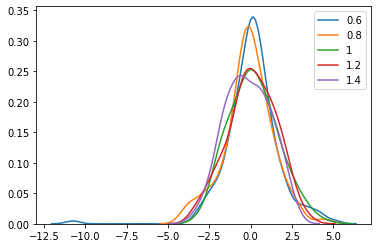

In [121]:
def invcdf(x, mean, var, epsilon, delta):
    return np.sinh(epsilon/delta + 1/delta * np.arcsinh(mean + np.sqrt(2*var) * erfinv(2*x-1)))

fig, ax = plt.subplots()
for d in [0.6, 0.8, 1, 1.2, 1.4]:
    size = 200
    u = np.random.rand(size)
    samples = invcdf(u, 0, 2, 0, d)
    samples = samples * np.sqrt(2 / est_tvar(d, 1000, 1000))
    print(samples.mean(), samples.var())
    sns.kdeplot(samples, label=str(d), ax=ax)
plt.legend()